In [1]:
import pandas as pd
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt


In [2]:
mpl.style.use("seaborn")
colors=["red","blue","green","yellow","pink","brown","grey","gold","aquamarine","violet","orange","beige","lime","magenta","#558dc8","#d37828","#8b81d6","#ae8a27","#684888","#958c43","#8f3859","#605b1d","#d27386","#814621","#af3c35","#c38053"]

mpl.rcParams["axes.prop_cycle"]=mpl.cycler("color",colors)

# Visualization 2 - Genres and Gross Relative
Like before we want to see genre popularity but with a perception of relative success. We will try to avarage the gross for each genre based on the amount of movies in said genre.

## Loading the dataframe
We will load the final table.

In [3]:
df = pd.read_csv("./output_data/final_table.csv")
df=df.drop("Unnamed: 0",axis=1)
df["genres"]=df["genres"].fillna("NA")

## Creating a list of genres, gross and tickets avaraged
We will start simply by create lists of our labels: `tickets` , `genres` , `gross`.


In [4]:
def createYearsPrefixArray(prefix:str,start:int,end:int):
    arr=[]
    for i in range(start,end+1):
        arr.append(f"{prefix}{i}")
    return arr

gross_list =createYearsPrefixArray("gross_",1995,2020)
tickets_list =createYearsPrefixArray("tickets_",1995,2020)
years_list = createYearsPrefixArray("",1995,2020)
genres=set()

for keys in df["genres"].unique().tolist():
    try: 
         for genre in keys.split(","): genres.add(genre)
    except:pass


## Gross - Genre Avarage Table.
Like before we would like to examine the genres popularity along the years. To do so we'll create a dataframe that stores each year's gross as a column and the rows would represent the genres. Different this time, we will divide the gross by the movie count for said genre at the given year.

In [5]:
gross_genres_years={}
for gross in gross_list:
    genres_dict={}
    for genre in genres:        
        sr = df[df["genres"].str.contains(genre)][gross]
        genres_dict[genre]=sr.sum()/sr.shape[0]
    gross_genres_years[gross]=genres_dict
gross_genres_years = pd.DataFrame(gross_genres_years)

## Pie Charts (again) !
Now we will _see_ if there are major leads among the genres after avaraging the gross. We will plot all years' gross in pie charts that is divided by genres.

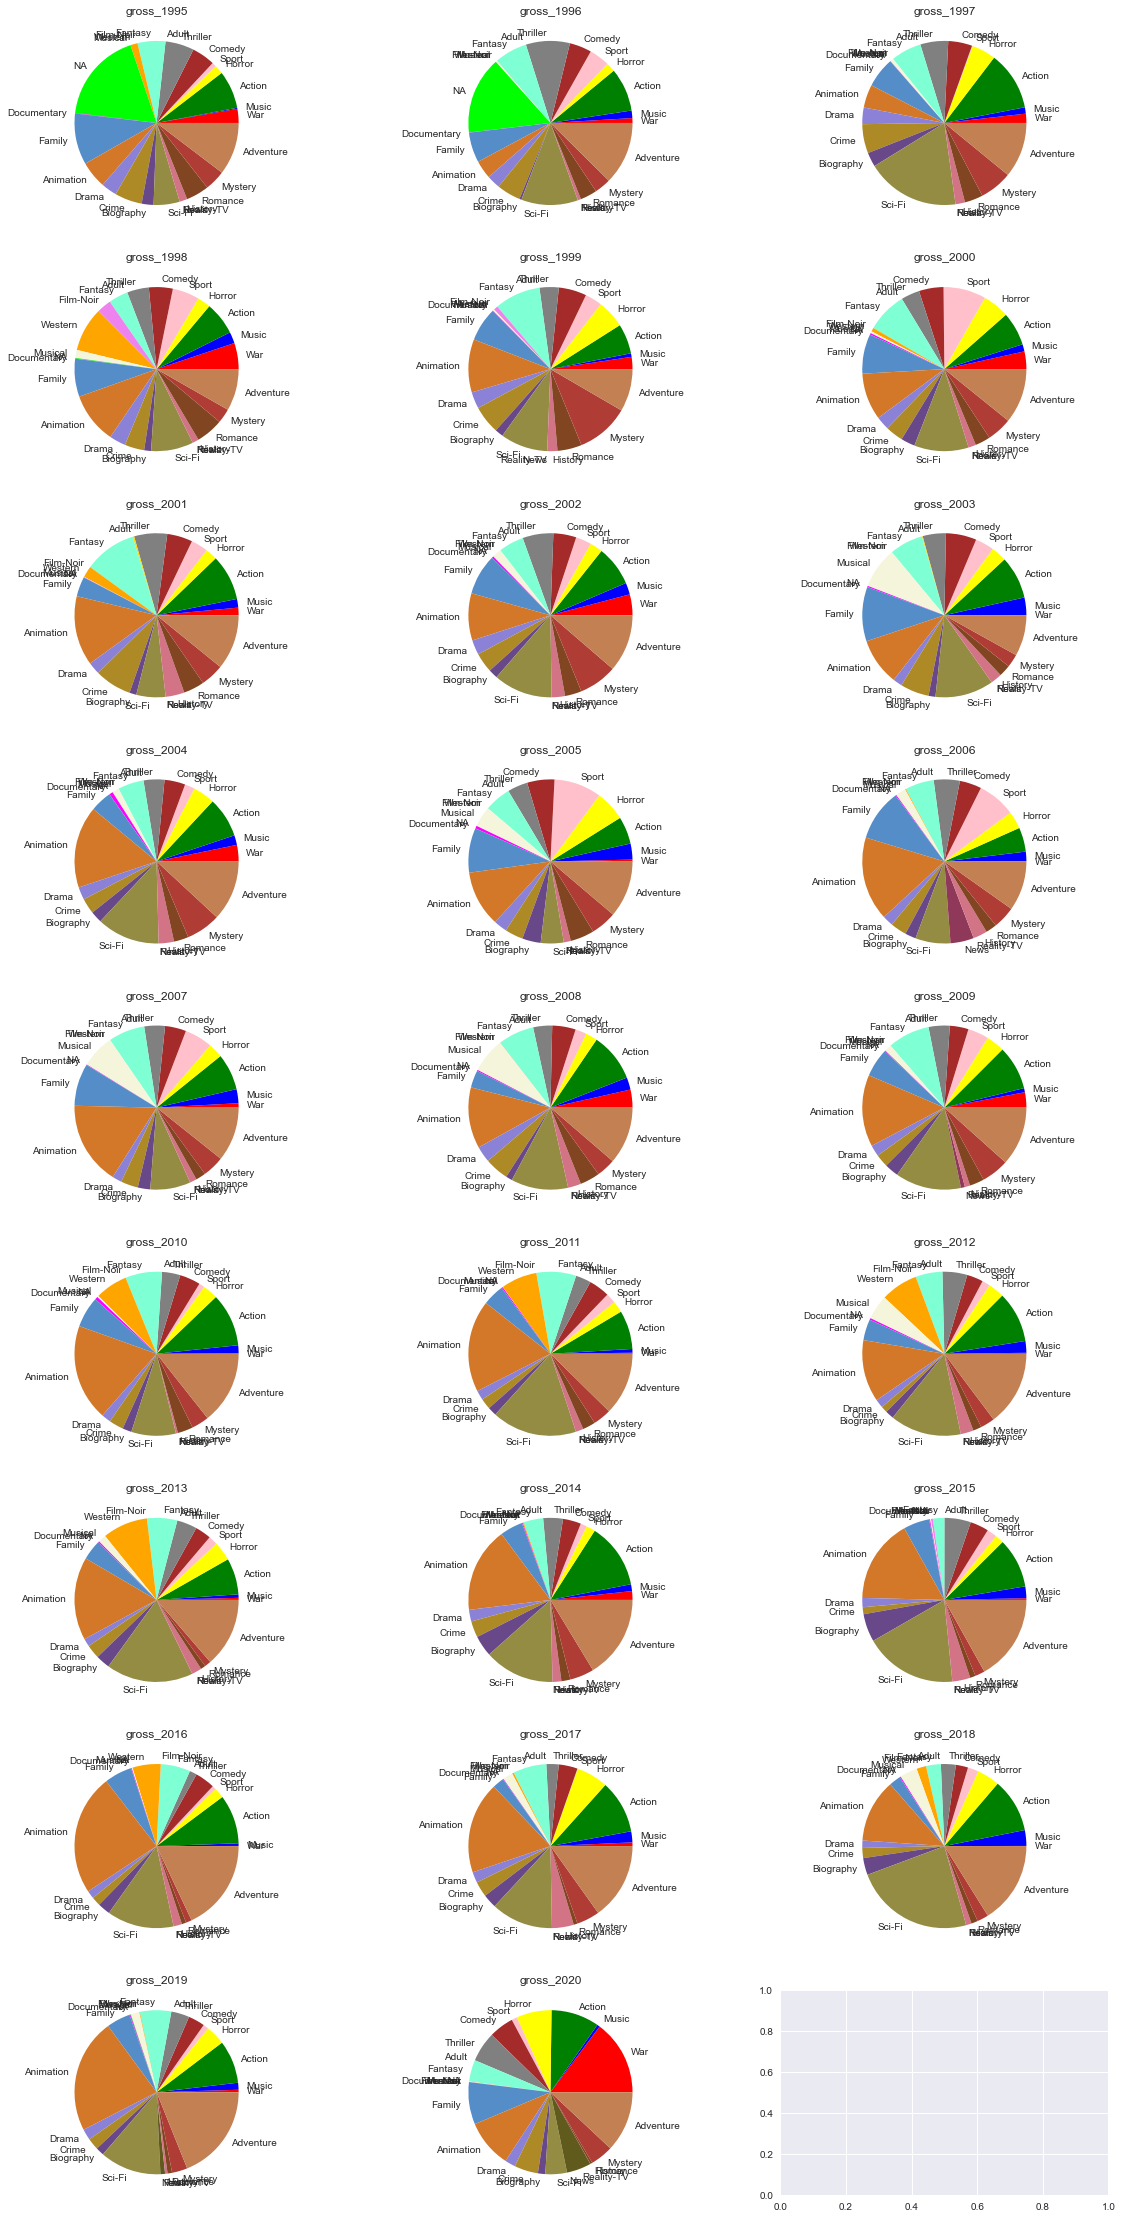

In [6]:
cols = 3
size=20
fig, axes = plt.subplots(len(gross_genres_years)//cols+1,cols, figsize=(size,size*2))
for i ,gross_year in enumerate(gross_list):
    pos = (i//cols,i%cols)
    axes[pos].pie(gross_genres_years[gross_year],labels=genres,colors=colors)
    axes[pos].title.set_text(gross_year)


## Same Data New Insights
It seems that the genre dominance after avaraging is heavily mutated and probably reflects the popularity much better.
The last time we did this visualization we have been mislead to believe that Comedy per se is really popular but the truth is that it was only because there were far more Comedy movies.

### Only from seeing - 
We can learn that each year has its own popularity distribution and there is a slight consistency along the years but much more vague than the last time we checked.
We would also want to see the line plot difference from last time

In [15]:
def plotGenres(df,genres):
    plt.figure(figsize=(15,10))
    plt.title("Genres Gross Comulative to Years")
    plt.xticks(np.arange(len(years_list)),years_list)
    plt.plot(df[genres])
    plt.legend(genres,loc="upper left")
    plt.show()


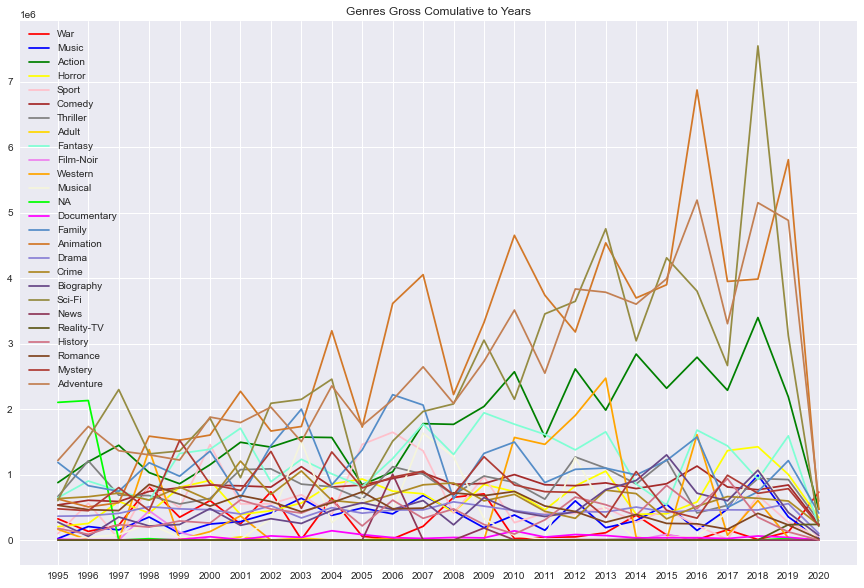

In [16]:
plotGenres(gross_genres_years.transpose(),genres)


## Eye Strain... BUT - 
Even with all the clutter, it seems that Animation really leading, we will focus on that from now on.
To summerize the popularity we will plot an all time pie chart.

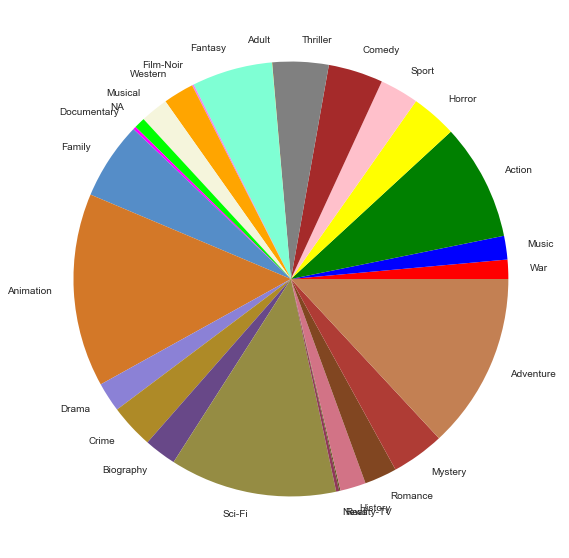

In [9]:
gross_all_time = gross_genres_years.transpose().sum()
fig = plt.figure(figsize=(20,10))
plt.pie(gross_all_time,labels=genres)
plt.show()
top_genres = (gross_all_time.sort_values(ascending=False)[:5]).keys().to_list()


## New Candidates
Now it really appears that Animation Adventure and Sci-Fi are the most popular, we will plot the top 5 like before and focus on them.<br/>

QUICK NOTE: Adventure was also popular in the previous visualization which means that the genre is popular among both production studios and viewers.

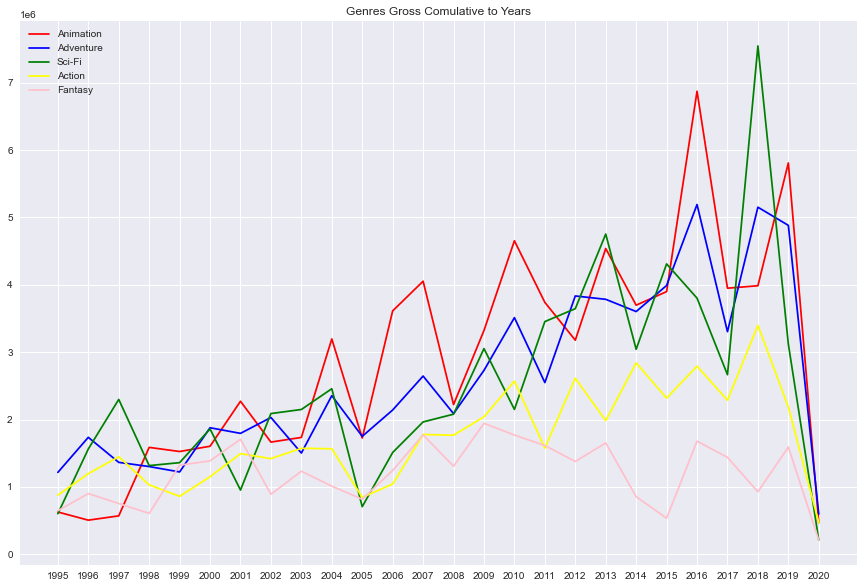

In [17]:
plotGenres(gross_genres_years.transpose(),top_genres)